# Dimensionality Reduction

The complexity of any classifier or regressor depends on the number of inputs (Both number of samples and features), this determines the time and space complexity of the classifier or regressor. So feature selection (Of which dimensionality reduction is a subset) becomes an important part of the decision making process.

Feature selection, ideally, should not be a seperate process and should infact be a part of the decision making algorithm.<br>
1. The complexity of most learning algorithms depend on the number of input samples N, and the dimensions of these samples D.So reducing these implies a direct reduction in time and space complexity of the algorithm. Reducing the dimensions D, also reduces the inference complexity during test times. This also, to a certain extent, helps explain the process of decision making better (Not always).
2. In case of feature extraction. If, for some reason, we decide to exclude  feature, we then save the cost of extracting said feature making the pipeline (Of decision making) more efficient.
3. Lower dimensions ensures less chances of overfitting (Usually) and hence a decision mking process that is explainable by only a few features is more robust (For smaller datasets)
4. Having lower dimensions help visualization and detecting structure of the data which could prove useful for outlier detection.

# Multi-Dimensional Scaling 

Multi domensional scaling aims to map the features from an unknown dimensional space to a N dimensional space.<br><br>
Consider N points in the data. The dimesnionality of these data points are unknown. Distance $d_{ij}$, for all points i , j where i , j = 1 , 2 , .. N , is given. The distance measure is unknown (Only the values of distance is given). Multi-dimensioanl scaling projects these data points from the unknown dimensional space to a N dimensional space, such that the euclidean distance between the given points (Say i, j) are as close to the given distances $d_{ij}$.

Multi-dimensional scaling can be used to reduce dimensions by passing the $d$ dimensional $x$ space as input, the pairwise euclidean distance is caluclated to project it to a lower dimensions while preserving the original dimensions.

The pairwise euclidean squared distance between points $r$ and $s$ is given by,
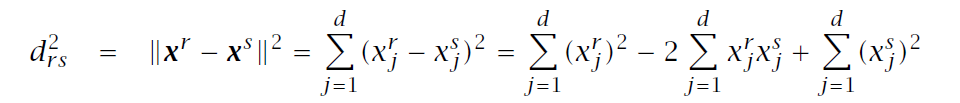

Now if we define $b_{rs}$ as
$$B = X*X^{T}$$
or more precisely,
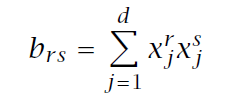

we get $d^{2}_{rs}$ as,
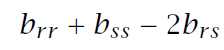

Note that this is zero mean. The sum of all data points will be equal to zero. This is a constraint on the data

Using the matrix B, we can get the eigen vectors of B and then the eigen values from those vectors. We choose $k$ dimensions, where,
$k < min (d , N)$

Multi-dimensional scaling does the same thing as PCA,
1. Both have a linear relationship with the original dimension $d$
2. PCA is calculated on Covariance matrix, whereas MDS is calculated on Correlation matrix. Essentially PCA on correlation matrix is the same as MDS with euclildean distance with unit variance variables.
3. PCA does this more efficiently

The objectives in brief can be written as :
1. As an exploratory technique to identify unrecognized dimensions affecting behavior 
2. As a means of obtaining comparative evaluations of objects when the specific bases of comparison are unknown or undefinable

# Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA)

## Principal component Analysis

In projection methods we try to find the mapping of input space in $d$ dimensions to a new $k ( < d)$ dimensions, with minimum loss of information. The projection of x on the direction w is,
$$Z = W^{T}*X$$

PCA is an unsupervised dimensionality reduction method (Does not require targets). It aims to find the principal component $w$ of $x$ such that $w$ has maximum variance (The difference between different points is maximum). To ensure solution is unique $||w||$ is equal to 1, this also makes the direction important.

Consider,<br><br>
$$Var(Z) = W^{T}*X$$
PCA aims to maximize $Var(Z)$ and keep $||W|| = 1$

Additionally the second principal component has to be orthogonal to the previous principal component (Dot product is zero). This ensures the correlation is minimized.
<br><br>
In brief:
1. PCA is an unsupervised algorithm(Requires no targets)
2. PCA uses the covariance matrix to find projection onto the new dimensions.
3. PCA maximizes varaince in the data and reduces correlation 
4. The eigen values are calculated using eigen vectors and these are arranged in descending order. The first principal component contributes hte maximum variance and so on.

## Linear discriminant analysis

Linear discriminant analysis is a supervised technique(Requires targets) for dimensionality reduction, mainly used for classification.<br><br>
Given samples from classes C1 and C2, LDA finds a projection from the original $d$ dimension to $k < min ( d , n)$ dimensions such that the seperation between the two classes is maximum. Here $n$ is the number of classes

LDA is also called Fisher’s linear discriminant. The objective function is called Fisher’s criterion J(w). The Fisher criterion is defined to be the ratio of the between-class variance to the within-class variance.

LDA also finds a projection of the data (Like PCA) but also uses the targets to maximise the distance between classes (Unlike PCA)

The projection is given by,
$$Z = W^{T}*X$$


While also optimizing the Fisher's Criterion $J(W)$ given by,
$$J(W) = \frac{(m_{1} - m_{2})^{2}}{(s_{1}^{2}+s_{2}^{2})}$$
where,<br>
$m_{i}$ is the mean of the class $i$<br>
$s_{i}^{2}$ is the scatter (Within class) of class $i$ 

LDA essentially increase the distance between the means of the classes while at the same time decreasing the within class scatter of the class. This is encapsulated by th Fisher's Criterion

In brief:<br>
1. LDA is a dimnesionality reduction method that is supervosed (Requires targets)
2. LDA is also a classifier of sorts. It aims for maximum seperation
3. Uses covariance matrix to find projection. And hence the number of samples has to be big (Otherwise inversion gives a singular value)
4. The resultant features are arranged in descending order of the seperation contribution. The first feature seperates the the most and so on.

# Demonstration of Dimensionality Reduction

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorflow as tf
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

https://www.kaggle.com/dipayanbiswas/parkinsons-disease-speech-signal-features

In [17]:
data = pd.read_csv("../Datasets/pd_speech_features.csv")
data = data.drop(data.columns[300:-1],axis = 1)
data = data.drop("id",axis = 1)

In [18]:
data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,app_LT_entropy_shannon_10_coef,app_LT_entropy_log_1_coef,app_LT_entropy_log_2_coef,app_LT_entropy_log_3_coef,app_LT_entropy_log_4_coef,app_LT_entropy_log_5_coef,app_LT_entropy_log_6_coef,app_LT_entropy_log_7_coef,app_LT_entropy_log_8_coef,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,-3601122.613,414.6434,276.4850,198.5803,153.8978,132.2489,124.1971,127.9812,130.3804,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,-3563560.603,413.5284,275.8597,198.1971,153.6379,132.0522,124.0327,127.8282,130.2373,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,-3539902.400,413.0675,275.5868,198.0149,153.5036,131.9418,123.9329,127.7329,130.1464,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,-3271399.011,413.6380,275.3259,197.2795,152.5940,130.9480,122.8786,126.6411,129.0689,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,-3367165.736,421.1396,279.1703,199.4350,153.7788,131.6258,123.3566,127.0837,129.4029,1


In [19]:
data.shape

(756, 300)

In [20]:
data.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,app_LT_entropy_shannon_10_coef,app_LT_entropy_log_1_coef,app_LT_entropy_log_2_coef,app_LT_entropy_log_3_coef,app_LT_entropy_log_4_coef,app_LT_entropy_log_5_coef,app_LT_entropy_log_6_coef,app_LT_entropy_log_7_coef,app_LT_entropy_log_8_coef,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,-4.143375e+06,425.629078,282.711578,202.511481,156.685856,134.482587,126.164411,129.842591,132.197901,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,4.876751e+05,22.146419,12.763780,7.567502,4.475900,2.819619,2.067284,1.888099,1.632429,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,-5.882489e+06,138.297600,115.908600,106.489700,102.332000,107.374200,111.134600,121.331100,126.152000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,-4.474741e+06,419.073075,279.039500,200.170825,155.049100,133.138125,124.978700,128.718000,131.123125,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,-4.155440e+06,428.110650,284.092300,203.374950,157.179700,134.804800,126.390950,130.046450,132.335200,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,-3.802516e+06,435.746200,288.434200,206.039200,159.002800,136.164075,127.547025,131.134600,133.346950,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,-2.665481e+06,467.377300,305.941900,216.634100,166.016500,141.399600,131.865800,135.165000,137.089700,1.000000


In [22]:
target = data["class"]
data_sec = data[data.columns[:-1]]

1    564
0    192
Name: class, dtype: int64
Baseline 74.60317460317461 %


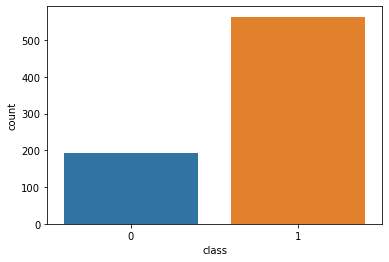

In [38]:
sns.countplot(target)
print(target.value_counts())
print("Baseline",(target.value_counts()[1]/target.shape[0])*100,"%")

In [145]:
X_train,X_test,Y_train,Y_test = train_test_split(data_sec,target,test_size = 0.2)

In [146]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(604, 299) (604,)
(152, 299) (152,)


In [147]:
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

Text(0, 0.5, 'Explained Variance ratio')

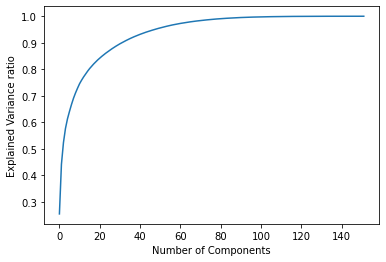

In [149]:
pca = PCA().fit(X_train)
X_pca = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
sums = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance ratio")

In [72]:
sums[80]

0.9657289439379847

Text(0, 0.5, 'PCA Component 2')

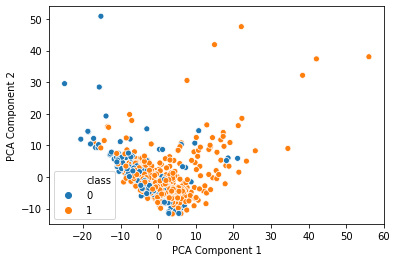

In [91]:
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue = Y_train)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

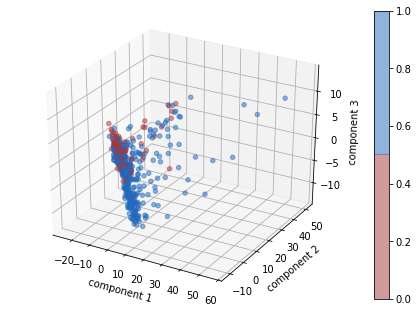

In [102]:
ax = Axes3D(plt.figure())
p = ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:,2],
            c=Y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('vlag_r', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.colorbar(p);

In [198]:
lda = LDA().fit_transform(X_train,Y_train)
lda_test = LDA().fit_transform(X_test,Y_test)

Text(0, 0.5, 'LDA Component 2')

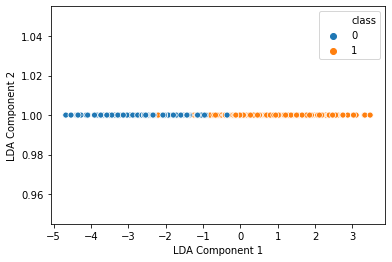

In [113]:
sns.scatterplot(lda[:,0],1,hue = Y_train)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")

In [110]:
lda.shape

(604, 1)

In [141]:
model_orig = tf.keras.models.Sequential([tf.keras.layers.Input(299,1),
                                        tf.keras.layers.Dense(units = 256,activation = tf.nn.relu),
                                        tf.keras.layers.Dense(units = 1,activation = tf.nn.sigmoid)])
model_orig.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
model_orig.build()
model_orig.summary()
model_orig.fit(X_train,Y_train.values,epochs = 10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (1, 256)                  76800     
_________________________________________________________________
dense_14 (Dense)             (1, 1)                    257       
Total params: 77,057
Trainable params: 77,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.5901 - acc: 0.7715
Epoch 2/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.2866 - acc: 0.8775
Epoch 3/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.2381 - acc: 0.9023
Epoch 4/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.1904 - acc: 0.9338
Epoch 5/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.1586 - acc: 0.9487
Epoch 6/10
604/604 [=======

In [144]:
print(model_orig.evaluate(X_train,Y_train.values)[1]*100)
print(model_orig.evaluate(X_test,Y_test.values)[1]*100)

604/604 [==============================] - 1s 882us/sample - loss: 0.7026 - acc: 0.9255
92.54966974258423
152/152 [==============================] - 0s 886us/sample - loss: 1.3734 - acc: 0.7632
76.31579041481018


In [224]:
feat = 150
model_pca = tf.keras.models.Sequential([tf.keras.layers.Input(feat,1),
                                        tf.keras.layers.Dense(units = 1024,activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(0.7)),
                                        tf.keras.layers.Dense(units = 1,activation = tf.nn.sigmoid)])
model_pca.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
model_pca.build()
model_pca.summary()
model_pca.fit(X_pca[:,:feat],Y_train.values,epochs = 20)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (1, 1024)                 154624    
_________________________________________________________________
dense_84 (Dense)             (1, 1)                    1025      
Total params: 155,649
Trainable params: 155,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
604/604 [==============================] - 2s 3ms/sample - loss: 7.3186 - acc: 0.7666
Epoch 2/20
604/604 [==============================] - 1s 2ms/sample - loss: 0.7312 - acc: 0.7748
Epoch 3/20
604/604 [==============================] - 1s 2ms/sample - loss: 0.7333 - acc: 0.7781
Epoch 4/20
604/604 [==============================] - 1s 2ms/sample - loss: 0.7175 - acc: 0.7765
Epoch 5/20
604/604 [==============================] - 1s 2ms/sample - loss: 0.6736 - acc: 0.7914
Epoch 6/20
604/604 [====

In [225]:
print(model_pca.evaluate(X_pca[:,:feat],Y_train.values)[1]*100)
print(model_pca.evaluate(X_pca_test[:,:feat],Y_test.values)[1]*100)

604/604 [==============================] - 1s 2ms/sample - loss: 0.4896 - acc: 0.8477
84.76821184158325
152/152 [==============================] - 0s 1ms/sample - loss: 0.7737 - acc: 0.7697
76.97368264198303


In [199]:
feat = 1
model_lda = tf.keras.models.Sequential([tf.keras.layers.Input(feat,1),
                                        tf.keras.layers.Dense(units = 256,activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                                        tf.keras.layers.Dense(units = 1,activation = tf.nn.sigmoid)])
model_lda.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
model_lda.build()
model_lda.summary()
model_lda.fit(lda[:,:feat],Y_train.values,epochs = 10)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (1, 256)                  512       
_________________________________________________________________
dense_60 (Dense)             (1, 1)                    257       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
604/604 [==============================] - 2s 3ms/sample - loss: 0.2425 - acc: 0.9139
Epoch 2/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.1736 - acc: 0.9255
Epoch 3/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.1689 - acc: 0.9288
Epoch 4/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.1655 - acc: 0.9321
Epoch 5/10
604/604 [==============================] - 1s 2ms/sample - loss: 0.1660 - acc: 0.9305
Epoch 6/10
604/604 [============

In [201]:
print(model_lda.evaluate(lda[:,:feat],Y_train.values)[1]*100)
print(model_lda.evaluate(lda_test[:,:feat],Y_test.values)[1]*100)

604/604 [==============================] - 1s 1ms/sample - loss: 0.1579 - acc: 0.9272
92.71523356437683
152/152 [==============================] - 0s 1ms/sample - loss: 0.0142 - acc: 1.0000
100.0
